In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.isnull().sum()

location      0
bedrooms    311
bath        311
size          0
price         0
dtype: int64

In [4]:
df2 = df.drop_duplicates()

In [5]:
df2.shape

(5904, 5)

In [6]:
df3 = df2.fillna(3)

In [7]:
df3.shape

(5904, 5)

In [8]:
df3.isnull().sum()

location    0
bedrooms    0
bath        0
size        0
price       0
dtype: int64

In [9]:
df3['location'] = df3['location'].str.lower()

In [10]:
df3['location'] = df3['location'].str.split(',',n=0,expand=True)

In [11]:
df3.head()

,location,bedrooms,bath,size,price
0,motijheelextension,3.0,2.0,1750,9500000
1,motijheelextension,3.0,2.0,1615,9500000
3,sector5,2.0,2.0,807,5200000
4,blockg,4.0,4.0,3100,40000000
5,eastmaniknagar,3.0,3.0,1300,6600000


In [14]:
bed20 = df3[df3['bedrooms']>20]
bed20

,location,bedrooms,bath,size,price
526,southmugdapara,24.0,10.0,7800,40000000
593,puranapaltan,29.0,10.0,16200,124500000
1128,ashulia,40.0,10.0,19000,25000000
1136,ashulia,30.0,10.0,5000,17000000
1204,blockh,28.0,10.0,17150,220000000
1363,southbanasreeproject,42.0,10.0,19440,100000000
1569,southbanasreeproject,40.0,10.0,16000,65000000
1570,rupnagarr/a,24.0,10.0,8400,35000000
1847,parkroad,30.0,10.0,22000,640000000
2090,dhalpur,24.0,10.0,8000,25000000


In [23]:
df4 = df3.copy()

In [45]:
df4.update = df3[df3['bedrooms']<20]

In [46]:
df4['bedrooms'].sort_values()

5139     1.0
8623     1.0
2387     1.0
6470     1.0
4333     1.0
        ... 
260     18.0
227     18.0
4936    18.0
3698    18.0
5391    19.0
Name: bedrooms, Length: 5878, dtype: float64

In [48]:
df4.update = df3[df3['bath']<20]

In [82]:
df4.update = df3[df3['size']<8000]
df4.update = df3[df3['size']<300]

In [83]:
df4.update = df3[df3['price']<30000000]

In [84]:
df4.shape

(5878, 5)

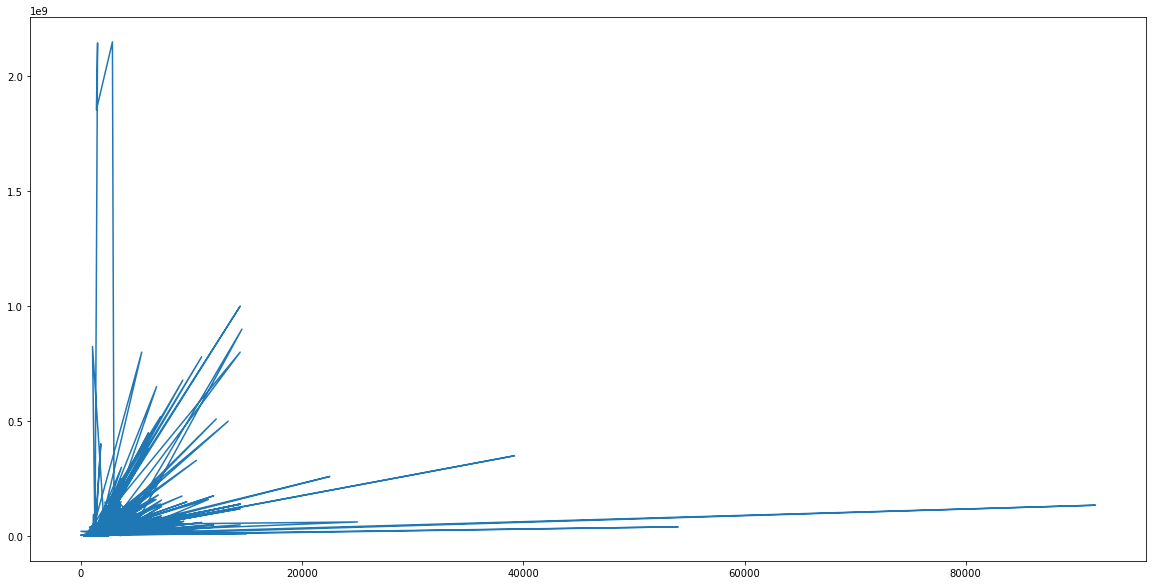

In [52]:
plt.plot(df4['size'],df4['price'])
plt.show()

In [75]:
df4.describe()

,bedrooms,bath,size,price
count,5878.000000,5878.00000,5878.000000,5.878000e+03
mean,2.998129,2.90524,1596.845185,1.498425e+07
std,1.044605,0.93449,1872.047660,5.973531e+07
min,1.000000,1.00000,2.000000,1.100000e+06
25%,3.000000,2.00000,1070.000000,5.200000e+06
50%,3.000000,3.00000,1303.000000,7.500000e+06
75%,3.000000,3.00000,1650.000000,1.200000e+07
max,19.000000,18.00000,91728.000000,2.147484e+09


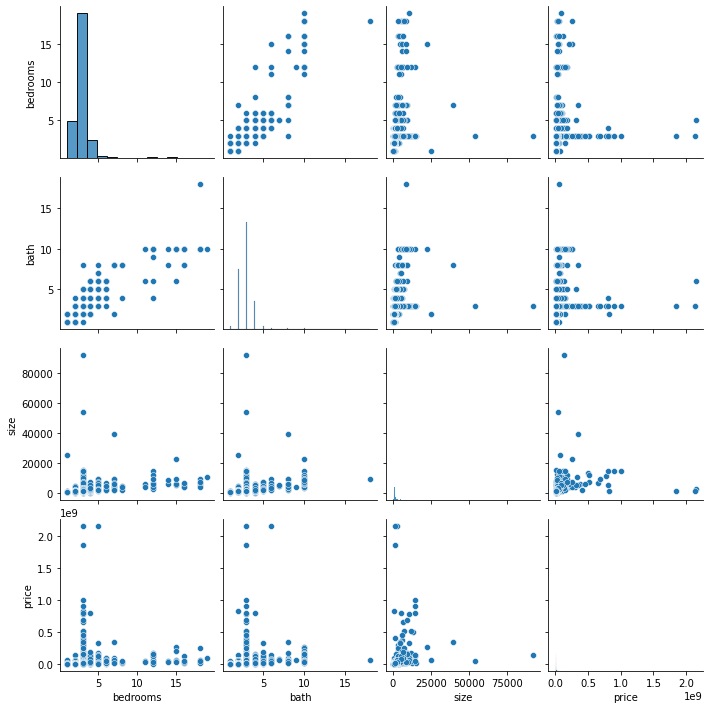

In [73]:
sns.pairplot(df4)

In [81]:
df4['size'].sort_values()

626         2
4306        2
4295        3
3868      250
1011      300
        ...  
252     22500
2387    25000
8278    39200
1694    54000
5252    91728
Name: size, Length: 5878, dtype: int64

In [55]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head()

location
sector10     185
pallabi      141
section12    103
ashkona      102
blockf       102
Name: location, dtype: int64

In [80]:
df4['bedrooms'].sort_values()

5139     1.0
8623     1.0
2387     1.0
6470     1.0
4333     1.0
        ... 
260     18.0
227     18.0
4936    18.0
3698    18.0
5391    19.0
Name: bedrooms, Length: 5878, dtype: float64

In [56]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10.head()

location
shantibag                      10
shahkabirmazarroad             10
crescentroad                   10
shyamolihousing(2ndproject)    10
nurjahanroad                   10
Name: location, dtype: int64

In [61]:
df4.location=df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

C:\Users\fahim\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


134

In [62]:
dummies = pd.get_dummies(df4.location)
dummies.head()

,ahmednagar,ashkona,ashulia,atibazar,baitulamanhousingsociety,bankcolony,banktown,bashabomadartekroad,blocka,blockb,...,tejkunipara,uttarbadda,vatara,wari,westagargaon,westdhanmondiandshangkar,westkazipara,westnakhalpara,westrampura,westshewrapara
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df5 = pd.concat([df4,dummies.drop('other',axis='columns')],axis='columns')

In [64]:
df5 = df5.drop('location',axis='columns')

In [65]:
X = df5.drop(['price'],axis='columns')
X.head(3)

,bedrooms,bath,size,ahmednagar,ashkona,ashulia,atibazar,baitulamanhousingsociety,bankcolony,banktown,...,tejkunipara,uttarbadda,vatara,wari,westagargaon,westdhanmondiandshangkar,westkazipara,westnakhalpara,westrampura,westshewrapara
0,3.0,2.0,1750,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,1615,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,807,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
y = df5.price
y.head(3)

0    9500000
1    9500000
3    5200000
Name: price, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [68]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.20022958141159342

In [69]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 0.24429754,  0.24664536,  0.15054105, -4.01867278, -0.05254191])

In [70]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,-0.685946,{'normalize': False}
1,lasso,-0.685942,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,-0.946891,"{'criterion': 'mse', 'splitter': 'random'}"


In [71]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [78]:
predict_price('sector10',3500, 2, 4)

4213716161.015365